In [91]:
# Importing required modules(non-scientific)
import random
import matplotlib.pyplot as plt
from math import exp

In [92]:
# Defining the required functions

# Choosing the class with the highest probability
def highest_predict(a):
    a1 = [[0] for i in a]
    a1[a.index(max(a))] = [1.0]
    return a1

# Checking if the example was classified correctly
def compare_index(a, b):
    if a.index([1.0]) == b.index([1.0]):
        return 1
    return 0

# Making a one-hot representation of a list
def one_hot(a, num_classes):
    for i in range(len(a)):
        a[i] = [[0] if j+1 !=a[i][0] else [1] for j in range(num_classes)]
    return a

# 2d list multiplication(a,b)
def mul(X,Y):
    return [[sum(a * b for a, b in zip(X_row, Y_col)) for Y_col in zip(*Y)] for X_row in X]

# Element-wise multiplication
def ele_mul(a, b):
    l = [[a[i][j] * b[i][j] for j in range(len(a[0]))] for i in range(len(a))]
    return l

# Subtraction for 2d list(b) from another 2d list(a)
def subtract(a,b):
    return [[a[i][j] - b[i][j] for j in range(len(a[0]))] for i in range(len(a))]

# Transpose of a 2d list(a)
def transpose(a):
    b = [[a[j][i] for j in range(len(a))] for i in range(len(a[0]))]
    return b

# Divide a 2d list(a) by a given number(b)
def divide(a,b):
    assert not isinstance(b, list)
    return [[a[i][j] / b for j in range(len(a[0]))] for i in range(len(a))]

# Implementing the sigmoid function
def sigmoid(a):
    return [[1/(1 + exp(-a[i][j])) for j in range(len(a[0]))] for i in range(len(a))]

# 2d list division(a,b) element by element
def div(a, b):
    return [[a[i][j]/b[i][j] for j in range(len(a[0]))] for i in range(len(a))]

In [93]:
# Forward Propagation
def forward_prop(X, W1, W2):
    X_hidden = mul(W1, X)

    A_hidden = sigmoid(X_hidden)
    
    A_hidden = [[1.0]] + A_hidden

    X_output = mul(W2, A_hidden)
    A_output = sigmoid(X_output)
    return A_output, [X_output, A_hidden]

In [94]:
# File read 
file = open('Colon_Cancer_CNN_Features.csv','r')
f = file.readlines()
f = [list(map(float , i.split(',')))  for i in f]
f = list(filter(lambda line : bool(line), f))
file.close()

In [95]:
#Random shuffle
random.shuffle(f)

# Augment the dataset
f = [[1.0] + x for x in f]

length = len(f)
#print(length)

# No of examples for training 
no_of_training_examples = int(0.8 * length)
f1 = f[0 : no_of_training_examples]

    
#print(len(f1[0]))
X_train = [ x[0 : len(f1[0])-1]  for x in f1]
X_train = [[ [X_train[i][j]] for j in range(len(X_train[0])) ] for i in range(len(X_train))]

Y_train = [ y[len(f1[0])-1 : len(f1[0])]  for y in f1]
no_of_features = len(X_train[0])

num_classes = 4

In [97]:
learning_rate = 0.001
no_of_classes = 4

# Range of values for the hidden layer
middle_range = range(5,16)

accuracy_over_train = []
accuracy_over_test = []

In [98]:
for middle_layer in middle_range:
    W1 = [[random.uniform(-1,1) for i in range(no_of_features)] for j in range(middle_layer)]
    W2 = [[random.uniform(-1,1) for i in range(middle_layer+1)] for j in range(no_of_classes)] 

    a = one_hot(Y_train, num_classes)
    epochs = 5
    for o in range(epochs):
        for i in range(no_of_training_examples):
            z, cache = forward_prop(X_train[i], W1, W2)

            # Step 1 of backprop
            dz = div(a[i], z)
            dz = [[-j[0]] for j in dz]
            ones = [[1] for j in range(num_classes)]
            dnet = ele_mul(z, subtract(ones,z))

            first_dot = ele_mul(dz, dnet)

            del2 = mul(first_dot, transpose(cache[1]))

            # Step 2 of backprop
            term1 = mul(transpose(W2), first_dot)
            ones = [[1] for j in range(len(cache[1]))]
            term2 = ele_mul(cache[1], subtract(ones, cache[1]))
            second_dot = ele_mul(term1, term2)
            second_dot = second_dot[1:]
            del1 = mul(second_dot, transpose(X_train[i]))


            # Update weights W2
            W2 = subtract(W2, divide(del2, 1/learning_rate))
            # Update weights W1
            W1 = subtract(W1, divide(del1, 1/learning_rate))

            
    # Testing over the training set
    Y_train = [ y[len(f1[0])-1 : len(f1[0])]  for y in f1]
    Y_one_hot_encoded = one_hot(Y_train, num_classes)
    total_correct = 0
    for t in range(no_of_training_examples):
        pred_val,_ = forward_prop(X_train[t], W1, W2)   
        classified = compare_index(highest_predict(pred_val), Y_one_hot_encoded[t])
        total_correct += classified
    
    store_array_train = (total_correct*100)/no_of_training_examples
    accuracy_over_train.append(store_array_train)
    
    # Testing over a separate test set
    f2 = f[no_of_training_examples : ]
    X_test = [ x[0 : len(f2[0])-1]  for x in f2]
    Y_test = [ y[len(f2[0])-1 : len(f2[0])]  for y in f2]

    X_test = [[ [X_test[i][j]] for j in range(len(X_test[0])) ] for i in range(len(X_test))]
    Y_one_hot_encoded = one_hot(Y_test, num_classes) 

    total_correct = 0
    no_of_test_examples = len(f2)
    for t in range(no_of_test_examples):
        pred_val,_ = forward_prop(X_test[t], W1, W2)    
        classified = compare_index(highest_predict(pred_val), Y_one_hot_encoded[t])
        total_correct += classified 
    
    store_array_test = (total_correct*100)/no_of_test_examples
    accuracy_over_test.append(store_array_test)
    
    print("Accuracy over train set with {} neurons in hidden layer is: {}".format(middle_layer, store_array_train))
    print("Accuracy over test set with {} neurons in hidden layer is: {}".format(middle_layer, store_array_test))
    print()
    

Accuracy over train set with 5 neurons in hidden layer is: 50.996550402453046
Accuracy over test set with 5 neurons in hidden layer is: 52.41379310344828

Accuracy over train set with 6 neurons in hidden layer is: 50.996550402453046
Accuracy over test set with 6 neurons in hidden layer is: 52.41379310344828

Accuracy over train set with 7 neurons in hidden layer is: 11.690302798006899
Accuracy over test set with 7 neurons in hidden layer is: 11.877394636015326

Accuracy over train set with 8 neurons in hidden layer is: 16.80720582598697
Accuracy over test set with 8 neurons in hidden layer is: 17.8544061302682

Accuracy over train set with 9 neurons in hidden layer is: 16.615561517822922
Accuracy over test set with 9 neurons in hidden layer is: 17.471264367816094

Accuracy over train set with 10 neurons in hidden layer is: 14.277500958221541
Accuracy over test set with 10 neurons in hidden layer is: 15.478927203065133

Accuracy over train set with 11 neurons in hidden layer is: 20.3717

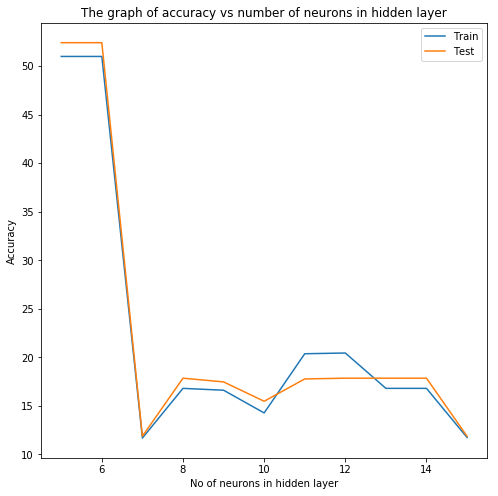

In [100]:
plt.figure(figsize=(8,8))
plt.title("The graph of accuracy vs number of neurons in hidden layer")
plt.xlabel('No of neurons in hidden layer')
plt.ylabel('Accuracy')
plt.plot(list(middle_range), accuracy_over_train, label = "Train")
plt.plot(list(middle_range), accuracy_over_test, label = "Test")
plt.legend(loc="best")
plt.show() 